<a href="https://colab.research.google.com/github/aryanfaghihi/ai-course/blob/master/Image%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Make a copy

**Follow the following steps to make your own copy. You will lose your changes if you don't make your own copy!**

From the tooltip above, you should see 

File | Edit | View | Insert | Runtime | Tools | Help

1. Click on **File**
2. Click on **Save a copy in Drive**

## Import

Let's import the required packages and setup some settings that will help us in this notebook.

In [1]:
# import the required packages
from fastai.vision import *
from fastai.vision.gan import *
import warnings

# ignore Python warnings
warnings.filterwarnings("ignore")

# Data


Today, we are going to be generating images that no one has seen before! For example, you can train a **generative model** to generate new images of cats or dogs or anything you like! Of course, it's easier said than done but we will go through all the steps necessary so that you can have your own generative model. 

![MnistExamples.png](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Woman_1.jpg/480px-Woman_1.jpg)

What's the image above you ask? it's generated using a generative model! Sadly you would need a couple of hundred computers and weeks of traning to be able to achieve results like this. More info about this image [here](https://en.wikipedia.org/wiki/StyleGAN)

Just to illustrate the concepts we will be using the **MNIST** dataset that you have seen from the first image workshop. But this time we will be generating new hand-drawn images instead of classifying what each digit looks like. I know, it's not as exciting but we simply don't have enough computing power on Google Colab to be able to train cooler models like the ones above.

In [9]:
# download and unzip the dataset
path = untar_data(URLs.MNIST_SAMPLE)

As usually let's look at the file structure for our dataset

In [10]:
# view the dataset structure
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/train')]

Next, let's step up our dataloader for training our model

In [11]:
# define dataloader
data = GANItemList.from_folder(path, noise_sz=100) \
            .split_none() \
            .label_from_func(noop) \
            .transform(tfms=[[crop_pad(size=32, row_pct=(0,1), col_pct=(0,1))], []], size=32, tfm_y=True) \
            .databunch(bs=128) \
            .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True)

It's not super critical for you to understand how this function works but just in case you are interested, here's a brief desctription for each method:

* `from_folder`: grab images from the folder (and its sub-folders)
* `split_none`: don't split our dataset into training and validation
* `label_from_func(noop)`: grab the labels for the dataset from a function. Here `noop` means "no operation", which means the label is equal to the training data. But why? this is a key feature of generative models which we will learn later.
* `transform`: define the transformations for preprocessing the imges. Here cropping and resizing have been applied. `tfm_y` means transform the validation set too!
* `databunch(bs=128)`: creates the dataloader with a batch size of 128. What is a batch size you may ask? it's the number of images that are used to train the model at a time.
* `normalize`: normalise the images with the given valuese (normalise to reduce the spread of data which helps with training)

Lastly, let's view batch of our data before moving on to the model

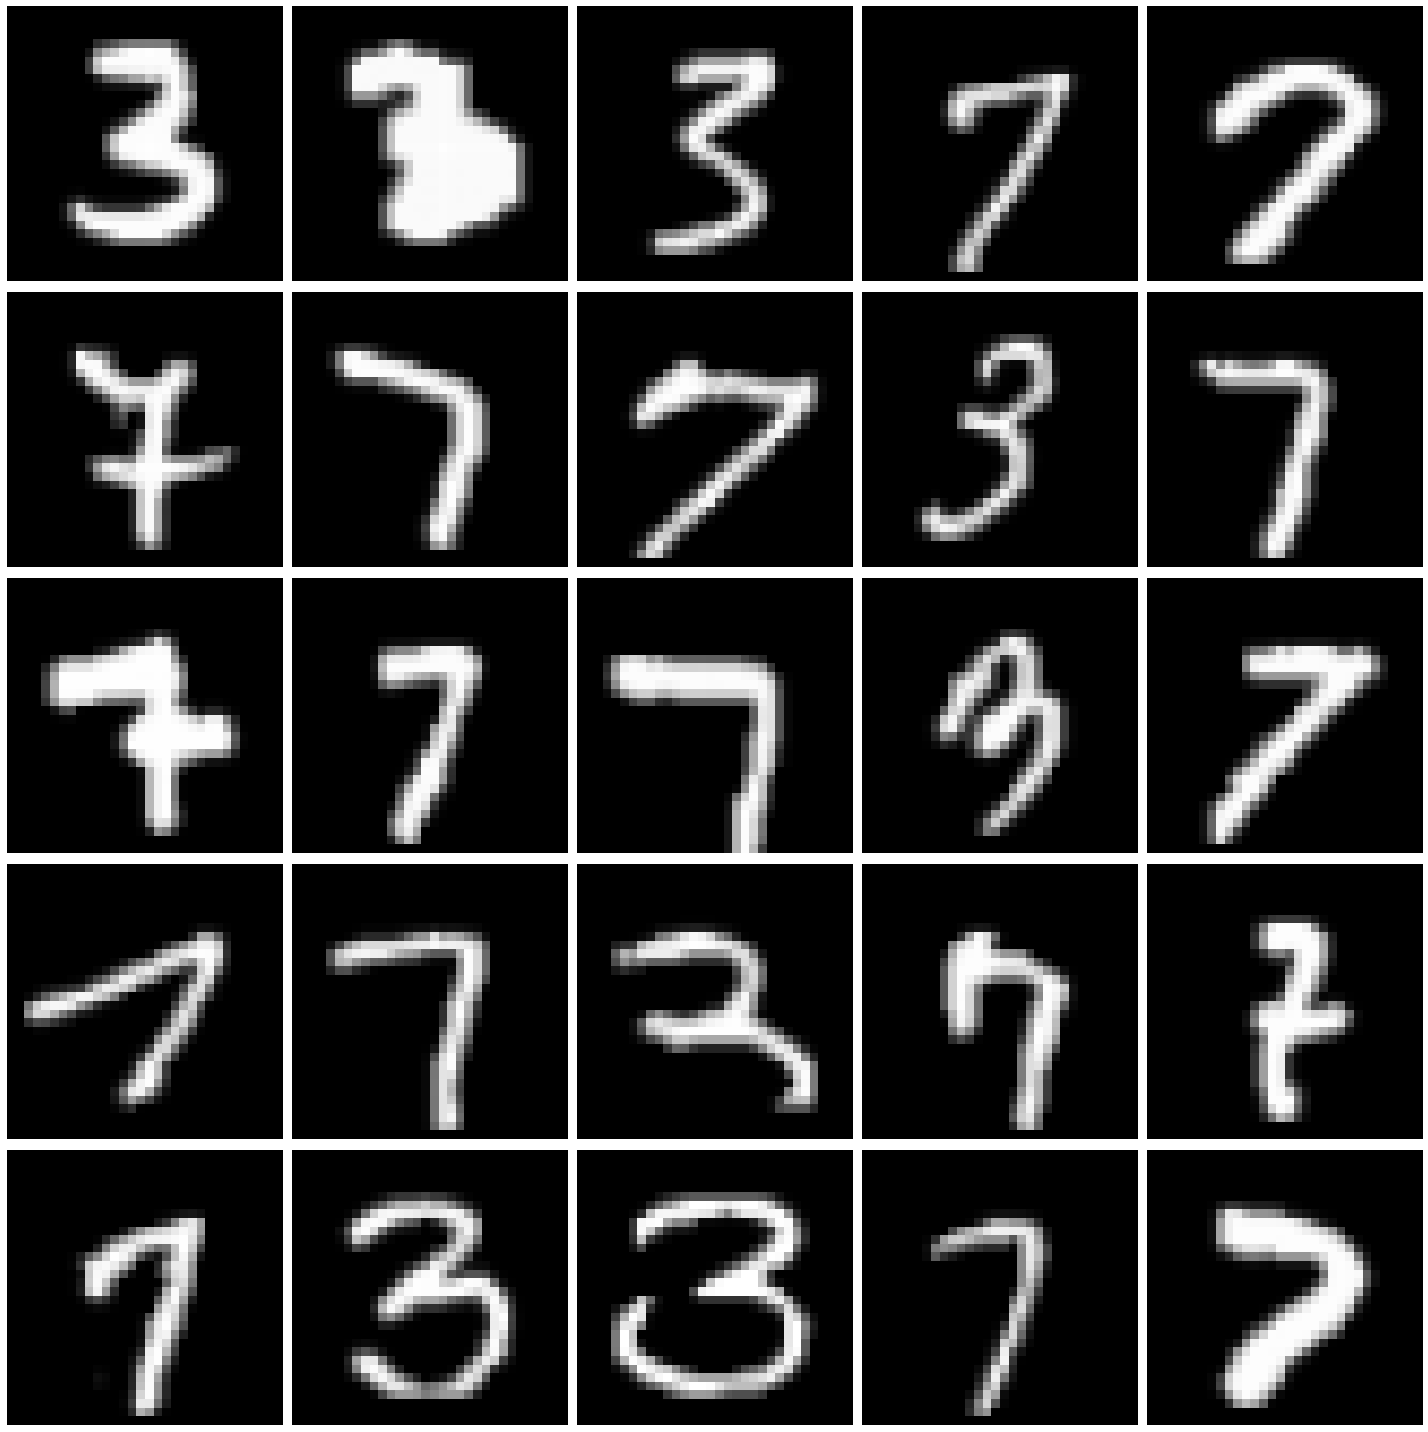

In [12]:
## view a batch of the dat 
### YOUR CODE HERE
data.show_batch()

# Model

## Training

Ok, let's get the model training first and then we will talk about what and how it's training a generative model. Why? because it takes a good 10 minutes!

In [20]:
# create a generator
generator = basic_generator(in_size=32, n_channels=3, n_extra_layers=1)

# create a critic
critic = basic_critic(in_size=32, n_channels=3, n_extra_layers=1)

In [21]:
# define our generative learner
learn = GANLearner.wgan(data, 
                        generator, 
                        critic, 
                        switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), 
                        wd=0.)

You don't really need to know the parameters here but here's the explanation if you are interested:


Now, we can start training.

In [23]:
learn.fit(40, 2e-4)

KeyboardInterrupt: ignored

## Gegenetive Models

Ok, let's go a step back, what are we doing exactly? 

We are training a model called **GAN** which stands for **Generative Adversarial Network**. 

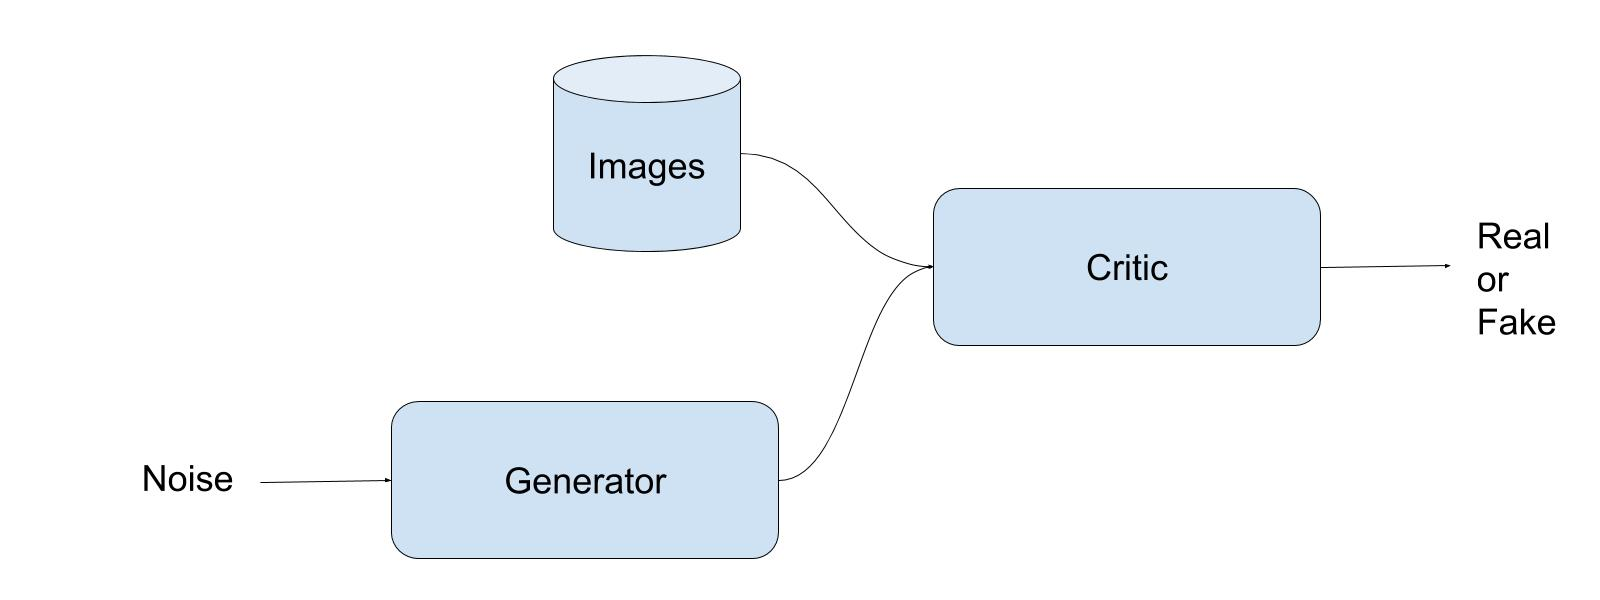

The main idea with GANs is having a **generator** and a **critic**. As the names suggest: 

* **Generator**, generates new images - hopefully images that we are interested in
* **Critic**, criticise the generator to be the best that it can be

The goal of the critic is to be able to differentiate between the real images and the fake ones generated by the generator. 

The goal of the generator is to generate images such that it can fool the critic into thinking they're actually real. 

The competition between the two models, actually helps both of them imrpve over time. If successful, the generator ends up generating images that we are interested in, in this example it would be hand-drawn digits.


---

Why do you think we have noise as input to the generator?

---

## Sampling

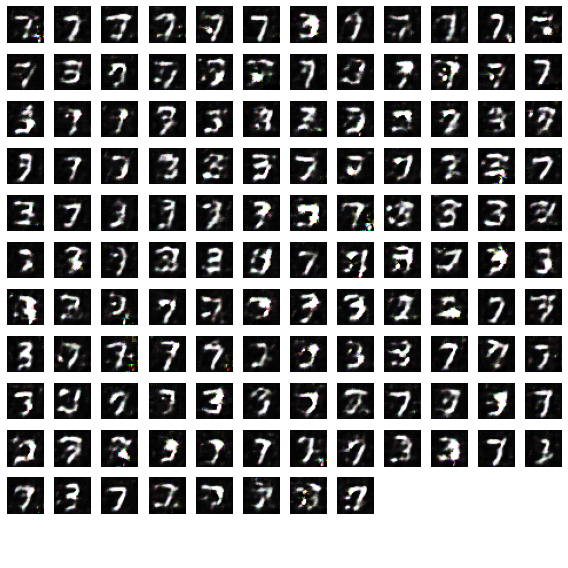

In [24]:
# switch the gan into generative mode
learn.gan_trainer.switch(gen_mode=True)

# show a batch of results
learn.show_results(ds_type=DatasetType.Train, rows=16, figsize=(8,8))

# Your Turn

Ok, now that we know how to create a generator using **GAN**, let's apply our learning to a new dataset. This new dataset is called *IMAGEWOOF* which contains photos of different breeds of dogs.

Let's walk through the example together.

In [26]:
# download and unzip the dataset
path = untar_data(URLs.IMAGEWOOF_160)

In [27]:
# view the dataset structure
path.ls()

[PosixPath('/root/.fastai/data/imagewoof2-160/val'),
 PosixPath('/root/.fastai/data/imagewoof2-160/train')]

In [30]:
# define dataloader
data = GANItemList.from_folder(path, noise_sz=100) \
            .split_none() \
            .label_from_func(noop) \
            .transform(tfms=[[crop_pad(size=64, row_pct=(0,1), col_pct=(0,1))], []], size=64, tfm_y=True) \
            .databunch(bs=128) \
            .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True)

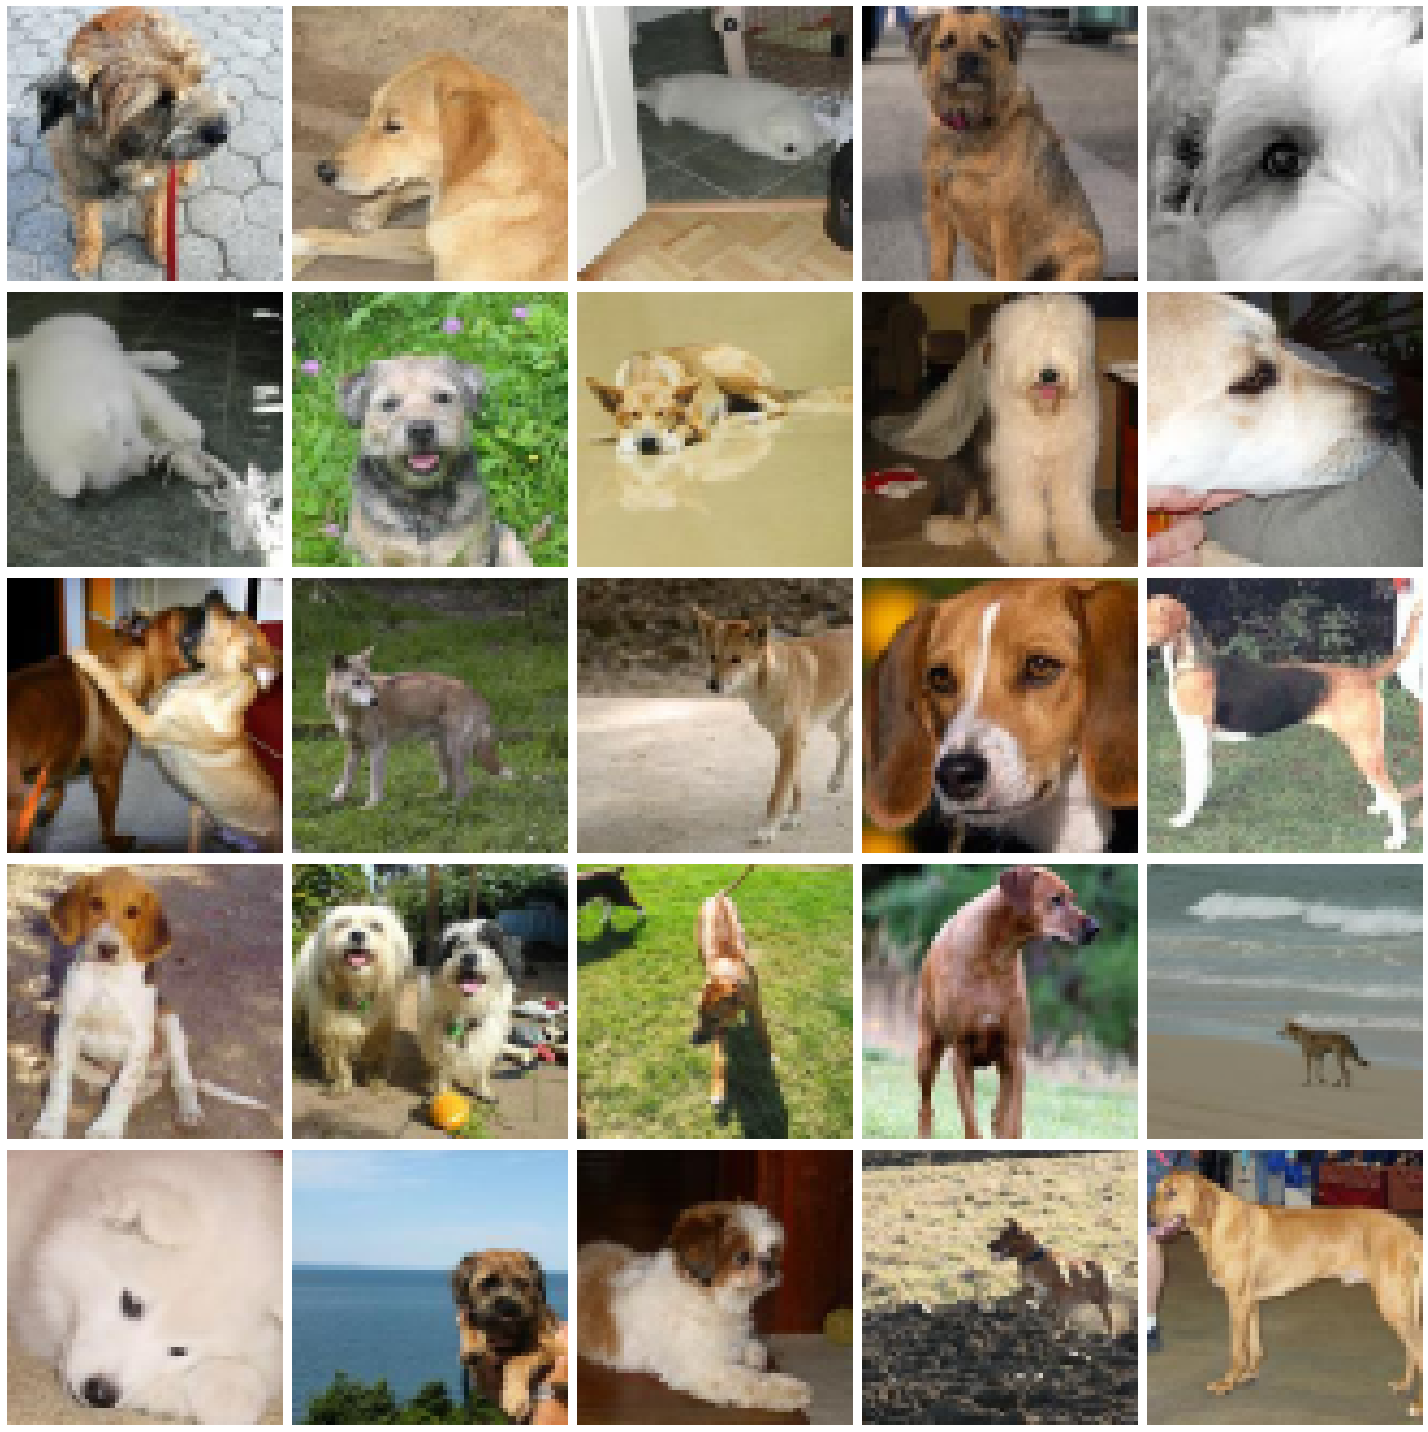

In [31]:
## display a batch of the data using show_batch()
### YOUR CODE HERE
data.show_batch()

In [33]:
# define your generator
## YOUR CODE HERE
## use an in_size of 64
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)

# create your critic
## YOUR CODE HERE
## use an in_size of 64
critic = basic_critic(in_size=64, n_channels=3, n_extra_layers=1)

# hint look at the synrax used in the training section above

In [34]:
# define our generative learner
learn = GANLearner.wgan(data, 
                        generator, 
                        critic, 
                        switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), 
                        wd=0.)

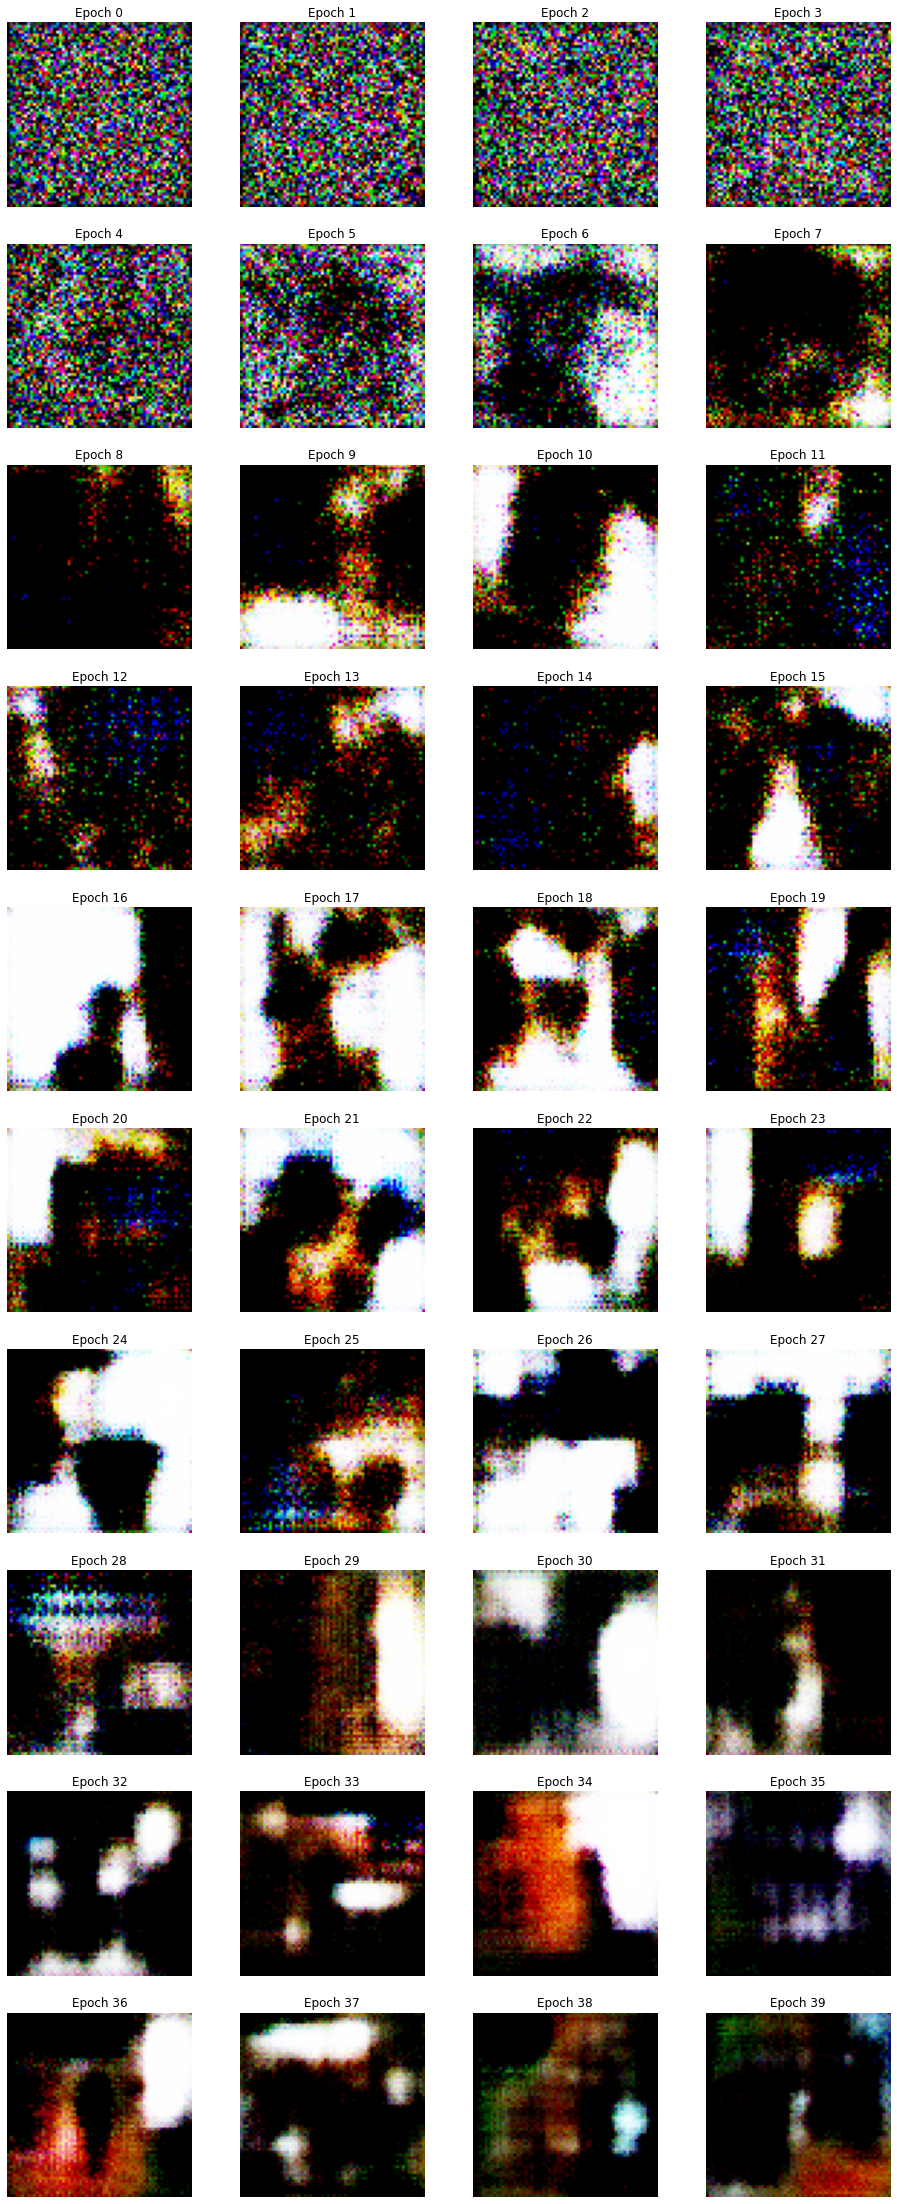

In [35]:
# start training the model
learn.fit(40, 2e-4)

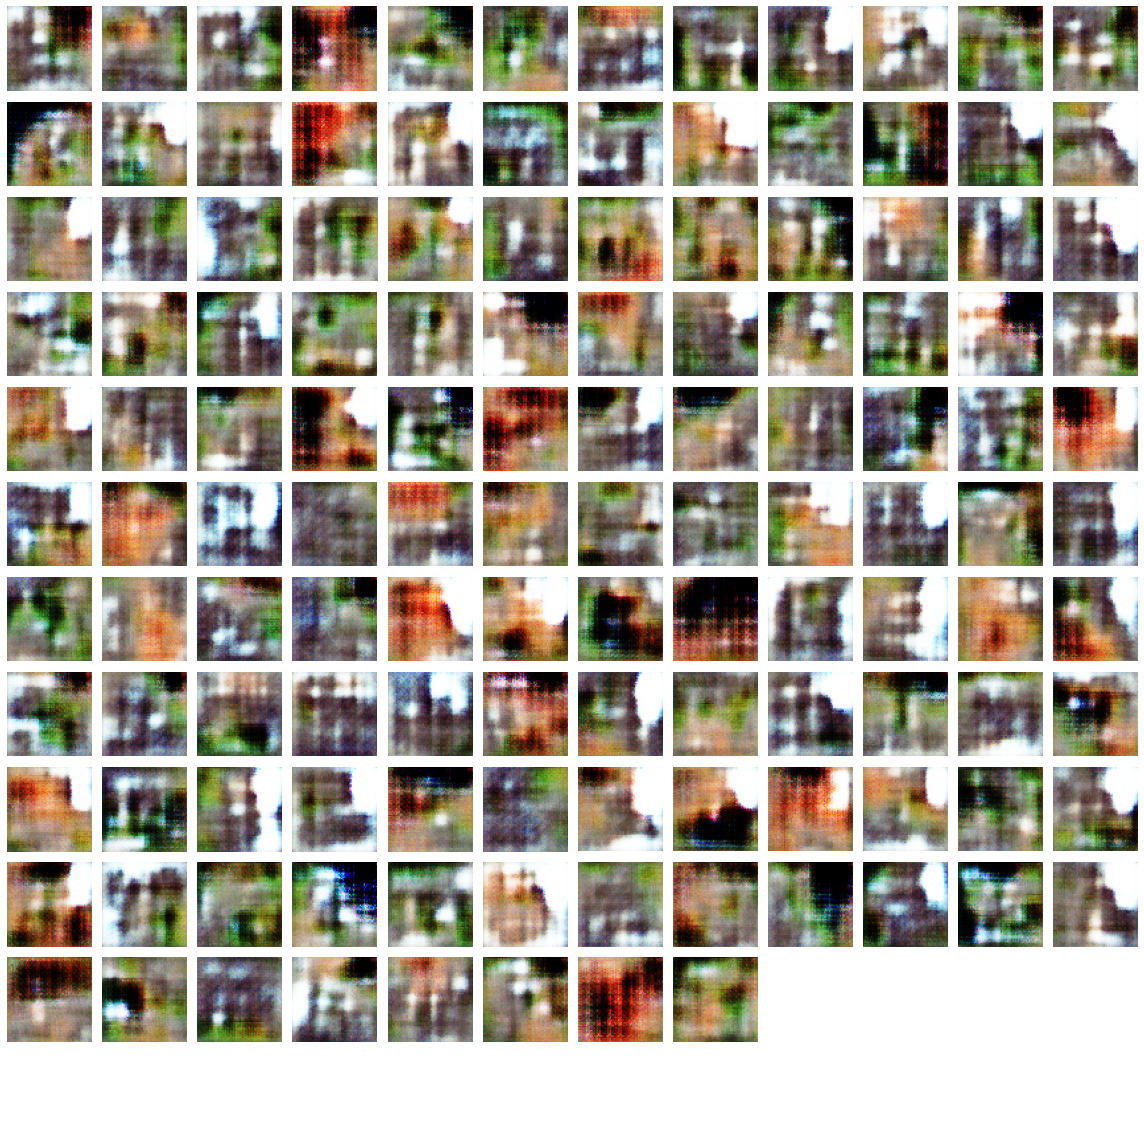

In [37]:
# view a batch of your results
# switch the gan into generative mode
learn.gan_trainer.switch(gen_mode=True)

# show a batch of results
learn.show_results(ds_type=DatasetType.Train, rows=16, figsize=(16,16))

# Summary